In [1]:
import numpy as np
from astropy.io import fits as pf
import matplotlib.pyplot as plt

In [9]:
#Import SpIES / SHELA data
data = '/Users/johntimlin/Complete_Clustering_Analysis/Clustering/Data_sets/HZLZ_combined_all_hzclassifiers_wphotoz_zspecflg.fits'
obs = pf.open(data)[1].data
Z = obs.zbest
imag = -2.5/np.log(10) * (np.arcsinh((obs.iflux/1e9)/(2*1.8e-10))+np.log(1.8e-10)) 

dx = ((Z >= 2.9) & (obs.dec>=-1.2) & (obs.dec<=1.2))
gdx = ((Z >= 2.9)&(imag >= 20.2) & (obs.dec>=-1.2) & (obs.dec<=1.2))

print 'median', np.median(Z[gdx])
print 'mean',np.mean(Z[gdx])
print 'max',np.max(Z[gdx])
print 'min',np.min(Z[gdx])

median 3.23399996758
mean 3.42056765046
max 5.23000001907
min 2.90093875606


[ 2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3
  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2]


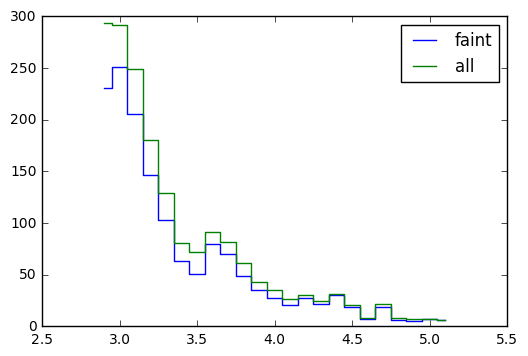

In [12]:
#Generate the redshift histogram for the faint objects

bins = np.arange(2.9,5.3,0.1)
print bins

fnum, bins = np.histogram(Z[gdx],bins)
anum, bins = np.histogram(Z[dx],bins)

plt.figure(1)
plt.plot(bins[:-1],fnum,linestyle = 'steps-mid', label = 'faint')
plt.plot(bins[:-1],anum,linestyle = 'steps-mid', label = 'all')
plt.legend()
plt.show()

In [33]:
#Split the redshifts into their appropriate bins

fullz = []
for i in range(len(bins)-1):
    zfull = Z[dx]
    lowx = bins[i]
    highx = bins[i+1]
    cdx = (zfull>=lowx) & (zfull < highx)
    frame = obs[dx][cdx]
    
    fullz.append(frame)
    

In [79]:
print np.shape(fullz)
print np.shape(fnum)

(23,)
(23,)


In [77]:
#Pull a random integer between 0 and 1 to 
import random

rands = random.sample(range(0,293),fnum[0])

print rands

[167, 146, 159, 206, 224, 144, 290, 112, 91, 94, 13, 263, 237, 272, 137, 230, 19, 55, 280, 101, 283, 175, 204, 129, 108, 130, 131, 6, 174, 207, 276, 145, 171, 128, 124, 278, 161, 126, 102, 89, 250, 249, 274, 277, 279, 107, 138, 178, 92, 85, 10, 29, 234, 152, 36, 156, 98, 172, 118, 68, 75, 23, 93, 59, 28, 82, 31, 61, 238, 192, 245, 241, 20, 235, 96, 292, 259, 104, 228, 47, 9, 209, 164, 111, 120, 70, 266, 21, 233, 158, 76, 270, 215, 38, 65, 22, 114, 16, 221, 217, 153, 246, 27, 255, 136, 14, 247, 12, 165, 202, 236, 86, 8, 0, 184, 219, 248, 239, 115, 106, 74, 183, 44, 213, 251, 125, 4, 57, 179, 244, 256, 52, 69, 218, 56, 67, 49, 99, 25, 240, 188, 281, 11, 132, 81, 214, 72, 46, 109, 168, 32, 33, 117, 196, 95, 254, 43, 195, 147, 41, 275, 220, 182, 189, 90, 48, 243, 205, 150, 194, 227, 110, 40, 35, 231, 199, 66, 2, 190, 123, 176, 186, 121, 24, 170, 261, 269, 77, 133, 39, 185, 181, 222, 198, 15, 282, 71, 58, 260, 143, 34, 201, 149, 17, 258, 200, 216, 285, 30, 84, 162, 64, 116, 203, 264, 122, 7

In [127]:
Flux= []
RA = []
DEC= []
Znew = []

for j in range(len(fullz)):
    vals = fnum[j]
    positions = random.sample(range(0,len(fullz[j])),vals)
    Flux.append(fullz[j][positions].iflux)
    RA.append(fullz[j][positions].ra)
    DEC.append(fullz[j][positions].dec)
    Znew.append(fullz[j][positions].zbest)


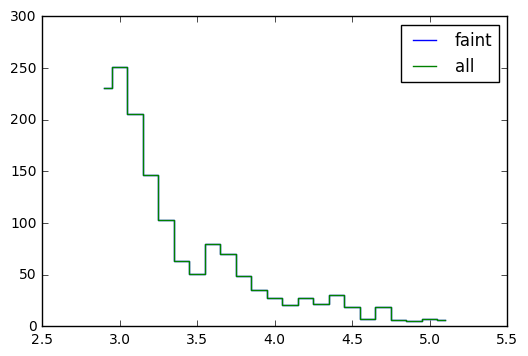

In [128]:
#Flatten the arrays
zflat = [i for lst in Znew for i in lst]
ra = [i for lst in RA for i in lst]
dec = [i for lst in DEC for i in lst]
iflux = [i for lst in Flux for i in lst]
#Generate the redshift histogram for the faint objects
nnum, bins = np.histogram(zflat,bins)

plt.figure(1)
plt.plot(bins[:-1],fnum,linestyle = 'steps-mid', label = 'faint')
plt.plot(bins[:-1],nnum,linestyle = 'steps-mid', label = 'all')
plt.legend()
plt.show()

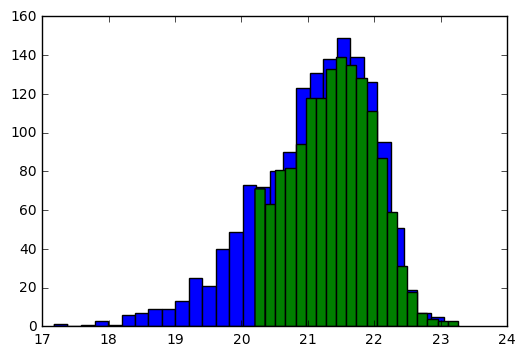

In [134]:
imagcut = -2.5/np.log(10) * (np.arcsinh((np.asarray(iflux)/1e9)/(2*1.8e-10))+np.log(1.8e-10)) 

plt.figure(3)
plt.hist(imagcut,bins=30)
plt.hist(imag[gdx],bins=20)

plt.show()

In [135]:
tbhdu=pf.BinTableHDU.from_columns([pf.Column(name='ra',format='D',array=np.asarray(ra)), pf.Column(name='dec',format='D',array=np.asarray(dec)),pf.Column(name='zbest',format='D',array=np.asarray(zflat))])
		

prihdr=pf.Header()
prihdr['COMMENT']="Redshift matched sample"
prihdu=pf.PrimaryHDU(header=prihdr)
	
hdulist=pf.HDUList([prihdu,tbhdu])
hdulist.writeto('HZLZ_bright_faint_zmatched.fits')
